In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("cleaned_ebay_deals.csv")

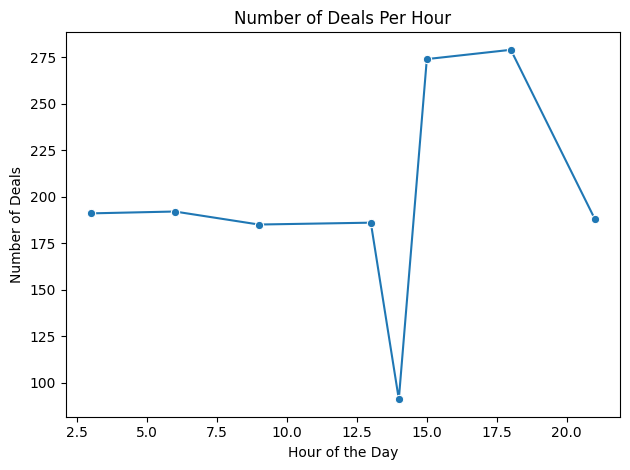

In [47]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.sort_values(by="timestamp")

df["hour"] = df["timestamp"].dt.hour
hourly_deals = df.groupby("hour").size()

sns.lineplot(x=hourly_deals.index, y=hourly_deals.values, marker='o')
plt.title("Number of Deals Per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Deals")
plt.tight_layout()
plt.show()

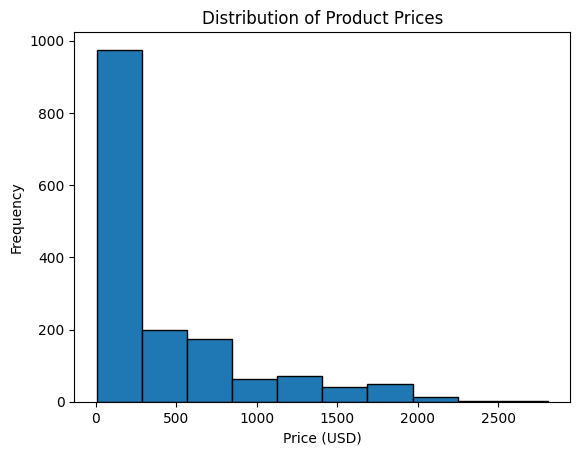

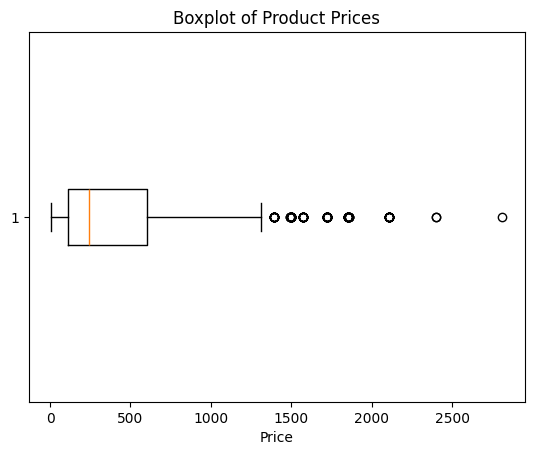

In [48]:
plt.hist(df["price"], bins=10, edgecolor='black')
plt.title("Distribution of Product Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

plt.boxplot(df["price"], vert=False)
plt.title("Boxplot of Product Prices")
plt.xlabel("Price")
plt.show()

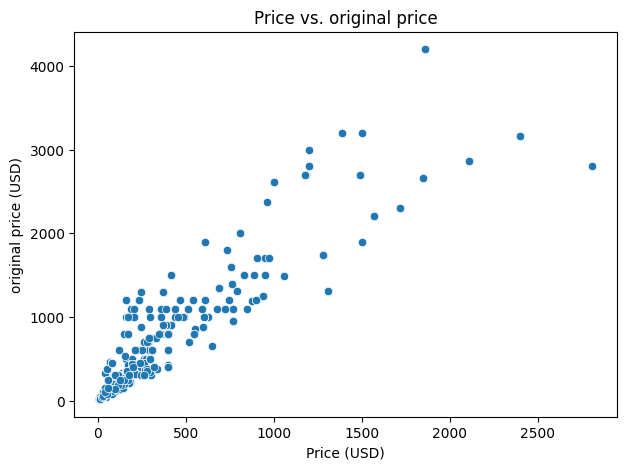

In [49]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='price', y='original price', data=df)
plt.title('Price vs. original price')
plt.xlabel('Price (USD)')
plt.ylabel('original price (USD)')
plt.show()

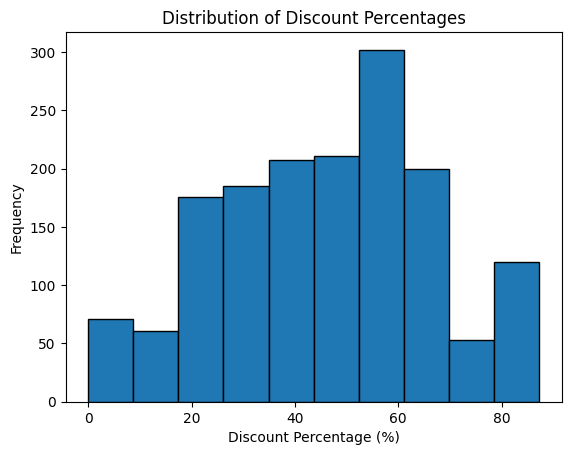

In [50]:
plt.hist(df["discount_percentage"], bins=10, edgecolor='black')
plt.title("Distribution of Discount Percentages")
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Frequency")
plt.show()

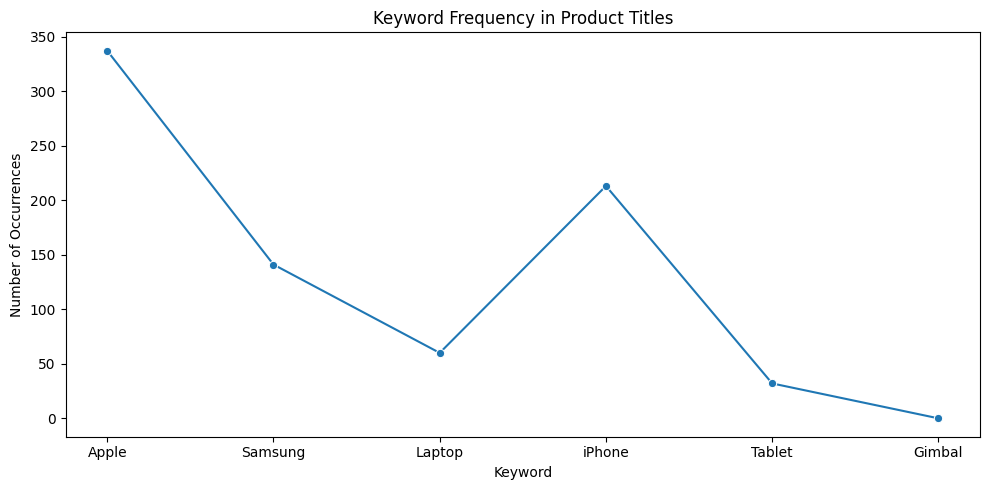

In [62]:
keywords = ["Apple", "Samsung", "Laptop", "iPhone", "Tablet", "Gimbal"]
df["title"] = df["title"].str.lower()
keyword_counts = {keyword: df["title"].str.contains(keyword.lower(), na=False).sum() for keyword in keywords}
keyword_df = pd.DataFrame(keyword_counts.items(), columns=["Keyword", "Count"])

plt.figure(figsize=(10, 5))
sns.lineplot(x=keyword_df["Keyword"], y=keyword_df["Count"], marker='o')
plt.title("Keyword Frequency in Product Titles")
plt.xlabel("Keyword")
plt.ylabel("Number of Occurrences")
plt.tight_layout()

plt.show()

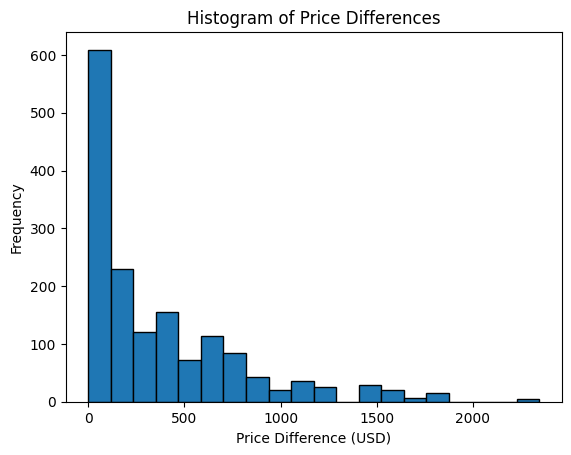

In [67]:
df["price_difference"] = df["original price"] - df["price"]
plt.hist(df["price_difference"], bins = 20, edgecolor = "black")
plt.title("Histogram of Price Differences")
plt.xlabel("Price Difference (USD)")
plt.ylabel("Frequency")
plt.show()

In [68]:
df_sorted = df.sort_values(by="discount_percentage", ascending=False)
top_5_deals = df_sorted.head(5)
print(top_5_deals)

                                                 title  price  original price  \
16   asus zenfone v v520kl a006 32gb verizon - exce...  41.95          329.00   
2    samsung galaxy watch4 classic 46mm r890 gps - ...  49.99          379.99   
641  samsung galaxy watch4 classic 46mm r890 gps - ...  49.99          379.99   
267  samsung galaxy watch4 classic 46mm r890 gps - ...  49.99          379.99   
732  samsung galaxy watch4 classic 46mm r890 gps - ...  49.99          379.99   

                                                   url           timestamp  \
16   https://www.ebay.com/itm/387587045897?_trkparm... 2025-03-21 14:48:52   
2    https://www.ebay.com/itm/255880698895?_trkparm... 2025-03-21 14:48:51   
641  https://www.ebay.com/itm/255880698895?_trkparm... 2025-03-22 09:30:06   
267  https://www.ebay.com/itm/255880698895?_trkparm... 2025-03-21 18:46:12   
732  https://www.ebay.com/itm/255880698895?_trkparm... 2025-03-22 13:01:41   

     discount_percentage  hour  price_differ